In [79]:
# -*- coding: utf-8 -*-
# from db_users import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

import scipy
import sys
from math import sqrt

from scipy.spatial.distance import cdist,pdist, squareform
from sklearn.metrics.pairwise import euclidean_distances

In [80]:
column_name = ['user_id', 'item_id', 'rating']
data_frame = pd.read_csv("u.data", sep='\t', names=column_name, usecols=column_name)

In [81]:
column_name = ['item_id', 'title']
movie_title = pd.read_csv("u.item", sep='|', names=column_name, usecols=column_name)

In [82]:
data_frame = pd.merge(data_frame, movie_title, on='item_id')

In [83]:
#data_frame.groupby('title')['rating'].mean().sort_values(ascending=False).head()
#data_frame.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

In [84]:
ratings = pd.DataFrame( data_frame.groupby('title')['rating'].mean())
ratings['count'] = data_frame.groupby('title')['rating'].count()
ratings = ratings.sort_values(by=['count'], ascending=False)
# ratings.head()

In [353]:
movie_matrix = data_frame.pivot_table(index=['item_id','title'],columns=['user_id'],values='rating')
movie_matrix.head()

,user_id,1,2,3,4,5,6,7,8,9,10,...,331,332,333,334,335,336,338,339,340,342
item_id,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GoldenEye (1995),NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Rooms (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Get Shorty (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Copycat (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
def dfLineToColumn(data_frame,idx):
    filmes = data_frame.loc[idx]
    filmes.dropna(axis=1, how='all',inplace=True)
    return pd.DataFrame(filmes.iloc[0])#transfora linhas em colunas

f_u_rating = dfLineToColumn(movie_matrix,267)

In [152]:
f_u_rating.index

Int64Index([5, 130], dtype='int64', name='user_id')

In [350]:
X_data_testing = pd.DataFrame( np.asarray(movie_matrix.fillna(0)))

matrix_euclidian = pd.DataFrame( euclidean_distances(X_data_testing,X_data_testing) ) 
matrix_euclidian.head()

,0,1,2,3,4,5,6,7,8,9,...,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060
0,0.000000,18.681542,17.606817,20.371549,17.663522,17.378147,22.847319,19.313208,22.825424,20.371549,...,17.492856,17.832555,17.378147,17.578396,17.378147,17.378147,17.578396,17.146428,17.233688,17.578396
1,18.681542,0.000000,11.000000,15.427249,11.618950,10.049876,18.627936,16.370706,16.970563,15.033296,...,10.246951,10.816654,10.049876,10.392305,10.049876,10.049876,10.392305,9.643651,9.797959,10.392305
2,17.606817,11.000000,0.000000,13.820275,8.485281,6.164414,18.000000,14.317821,16.031220,12.767145,...,6.480741,7.348469,6.164414,6.708204,6.164414,6.164414,6.708204,5.477226,5.744563,6.708204
3,20.371549,15.427249,13.820275,0.000000,14.317821,13.076697,21.000000,18.384776,19.748418,17.204651,...,13.228757,13.674794,13.076697,13.341664,13.076697,13.076697,13.341664,12.767145,12.884099,13.341664
4,17.663522,11.618950,8.485281,14.317821,0.000000,7.211103,17.944358,14.177447,15.716234,13.304135,...,7.483315,8.246211,7.211103,7.681146,7.211103,7.211103,7.681146,6.633250,6.855655,7.681146


In [382]:
result = { }

for idx in f_u_rating.index:
    print("-----\n",idx)
    filmes_u = movie_matrix[idx]
    filmes_u.dropna(inplace=True)
#     print(filmes_u)
    for c in  filmes_u.iteritems():
        filmId = c[0][0]
#         print(filmId)
        if( filmId != idx and filmId in matrix_euclidian.index):
            result[idx] = matrix_euclidian.loc[filmId].sort_values(ascending=True)
            result[idx] = result[idx][1:5]
#             
            
    
    filmes_u = ""

-----
 5
-----
 130


In [479]:
# movie_matrix.xs(1,level='item_id')
result[130]

532     1.732051
37      4.123106
426     4.123106
1022    4.123106
Name: 1017, dtype: float64

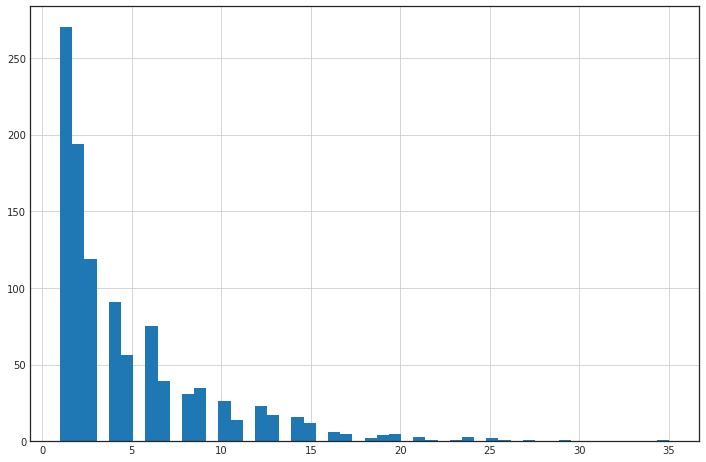

In [412]:
plt.figure( figsize=(12,8) )
ratings['count'].hist(bins=50)

In [469]:
value = int((ratings[['count']].sort_values(by='count',ascending=False).iloc[0]['count'])/3)

/home/romulo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romulo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x576 with 0 Axes>

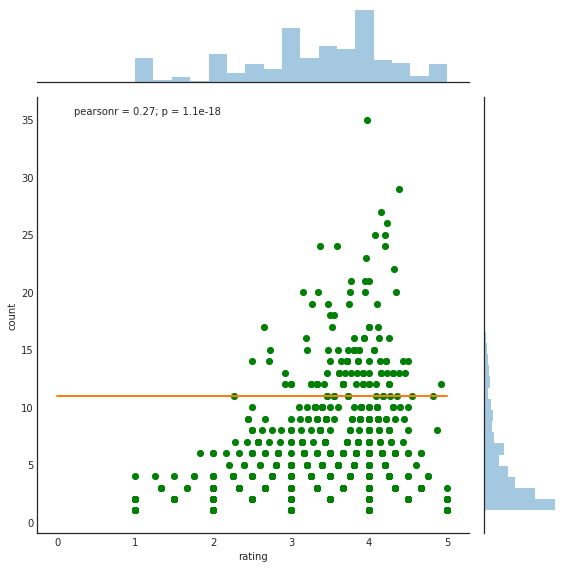

In [509]:
plt.figure( figsize=(12,8) )

ratings = pd.DataFrame( data_frame.groupby('title')['rating'].mean() )
ratings['count'] = data_frame.groupby('title')['rating'].count()

# ratings['count'] = ratings['count'][ratings['count'] > value]

g = sns.jointplot( x='rating', y='count', data=ratings, alpha=0.4,size=8)

g.plot_joint(plt.scatter, color="g")
plt.plot([0, 5.0], [value, value], linewidth=2)
